# 1. Import libraries

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
import pybboxes as pbx
from ultralytics import YOLO

# 2. Defining Paths

In [9]:
ROOT = r"D:\ML_datasets\MyAnimalYOLO2"
TARGET_PATH = os.path.join(ROOT, "YOLO_final")
ANIMALS = ["crocodile", "humpback_whale", "jaguar", "rhino", "wolf"]
IMAGE_PATHS = [os.path.join(ROOT, animal) for animal in ANIMALS]
YAML_FILE_PATH = r"D:\ML_datasets\MyAnimalYOLO2\YOLO_final\data.yaml"

# 3. Plotting some samples

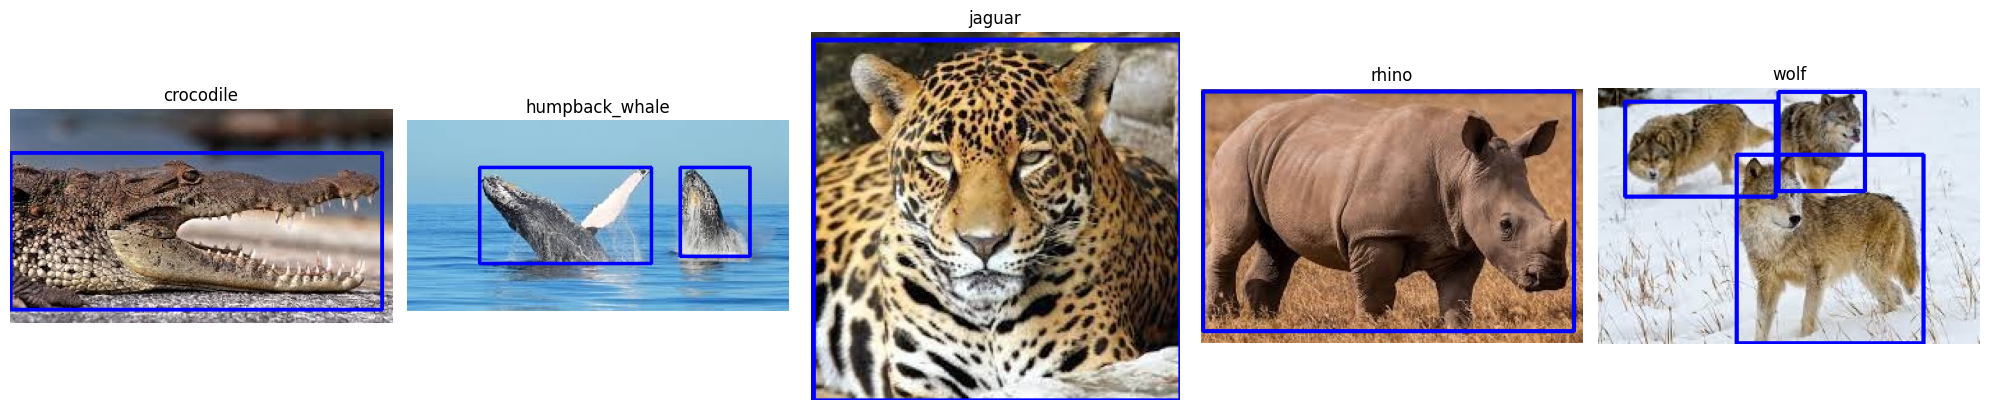

In [4]:
# some random selected images for each class
sample_images = [os.path.join(TARGET_PATH, "crocodile265.jpg"), os.path.join(TARGET_PATH, "humpback_whale_60.jpg"),
                 os.path.join(TARGET_PATH, "jaguar107.jpg"), os.path.join(TARGET_PATH, "rhino55.jpg"),
                 os.path.join(TARGET_PATH, "wolf396.jpg")]
sample_labels = [os.path.join(TARGET_PATH, "crocodile265.txt"), os.path.join(TARGET_PATH, "humpback_whale_60.txt"),
                 os.path.join(TARGET_PATH, "jaguar107.txt"), os.path.join(TARGET_PATH, "rhino55.txt"),
                 os.path.join(TARGET_PATH, "wolf396.txt")]

# Create a figure and subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i in range(len(sample_images)):
    image = cv2.imread(sample_images[i], cv2.IMREAD_COLOR)
    H, W, _ = image.shape
    bbox = []
    with open(os.path.join(TARGET_PATH, sample_labels[i])) as f:
        label_file = f.read().split("\n")
        # label_file.pop()

        for coord in label_file:
            coord_list = coord.split(" ")

            bbox.append((float(coord_list[1]), float(coord_list[2]), float(coord_list[3]), float(coord_list[4])))
    for box in bbox:
        bbox_image = pbx.convert_bbox(box, from_type="yolo", to_type="voc", image_size=(W, H))
        cv2.rectangle(image, (bbox_image[0], bbox_image[1]), (bbox_image[2], bbox_image[3]), (255, 0, 0), 2)

    # Display images on each subplot
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
    axs[i].set_title(ANIMALS[i])

# Adjust spacing between subplots
fig.tight_layout()
# Display the figure
plt.show()


# 4. Splitting Data into Training and Validation Data for YOLO

## Counting how many samples we have for each category

In [10]:
crocodile_count = 0
humpback_whale_count = 0
jaguar_count = 0
rhino_count = 0
wolf_count = 0

for sample in tqdm(os.listdir(TARGET_PATH), colour="red"):
    sample_name = sample.split(".")[0]

    if "crocodile" in sample_name:
        crocodile_count += 1
    elif "hump" in sample_name:
        humpback_whale_count += 1
    elif "jaguar" in sample_name:
        jaguar_count += 1
    elif "rhino" in sample_name:
        rhino_count += 1
    elif "wolf" in sample_name:
        wolf_count += 1
    else:
        print(sample_name)

print(f"We have {crocodile_count // 2} Crocodile samples")
print(f"We have {humpback_whale_count // 2} Humpback Whale samples")
print(f"We have {jaguar_count // 2} Jaguar samples")
print(f"We have {rhino_count // 2} Rhino samples")
print(f"We have {wolf_count // 2} Wolf samples")

100%|██████████| 1738/1738 [00:00<00:00, 577036.36it/s]

We have 174 Crocodile samples
We have 226 Humpback Whale samples
We have 66 Jaguar samples
We have 203 Rhino samples
We have 200 Wolf samples


We will split as followed for each category:

80% Training Data
10% Validation Data
10% Test Data

In [11]:
# using the code from above

crocodile_count2 = 0
humpback_whale_count2 = 0
jaguar_count2 = 0
rhino_count2 = 0
wolf_count2 = 0

train_data = []
val_data = []
test_data = []

for sample in tqdm(sorted(os.listdir(TARGET_PATH)), colour="red"):
    sample_name, _ = sample.split(".")

    if "crocodile" in sample_name:
        if crocodile_count2 <= int(crocodile_count * 0.81):
            train_data.append(os.path.join(TARGET_PATH, sample))
        elif int(crocodile_count * 0.81) <= crocodile_count2 <= int(crocodile_count * 0.9):
            val_data.append(os.path.join(TARGET_PATH, sample))
        elif crocodile_count2 > int(crocodile_count * 0.9):
            test_data.append(os.path.join(TARGET_PATH, sample))

        crocodile_count2 += 1

    elif "hump" in sample_name:
        if humpback_whale_count2 <= int(humpback_whale_count * 0.8):
            train_data.append(os.path.join(TARGET_PATH, sample))
        elif int(humpback_whale_count * 0.8) <= humpback_whale_count2 <= int(humpback_whale_count * 0.91):
            val_data.append(os.path.join(TARGET_PATH, sample))
        elif humpback_whale_count2 > int(humpback_whale_count * 0.91):
            test_data.append(os.path.join(TARGET_PATH, sample))

        humpback_whale_count2 += 1

    elif "jaguar" in sample_name:
        if jaguar_count2 <= int(jaguar_count * 0.8):
            train_data.append(os.path.join(TARGET_PATH, sample))
        elif int(jaguar_count * 0.8) <= jaguar_count2 <= int(jaguar_count * 0.92):
            val_data.append(os.path.join(TARGET_PATH, sample))
        elif jaguar_count2 > int(jaguar_count * 0.92):
            test_data.append(os.path.join(TARGET_PATH, sample))

        jaguar_count2 += 1

    elif "rhino" in sample_name:

        if rhino_count2 <= int(rhino_count * 0.811):
            train_data.append(os.path.join(TARGET_PATH, sample))
        elif int(rhino_count * 0.811) <= rhino_count2 <= int(rhino_count * 0.9):
            val_data.append(os.path.join(TARGET_PATH, sample))
        elif rhino_count2 > int(rhino_count * 0.9):
            test_data.append(os.path.join(TARGET_PATH, sample))

        rhino_count2 += 1

    elif "wolf" in sample_name:

        if wolf_count2 <= int(wolf_count * 0.813):
            train_data.append(os.path.join(TARGET_PATH, sample))
        elif int(wolf_count * 0.813) <= wolf_count2 <= int(wolf_count * 0.913):
            val_data.append(os.path.join(TARGET_PATH, sample))
        elif wolf_count2 > int(wolf_count * 0.913):
            test_data.append(os.path.join(TARGET_PATH, sample))

        wolf_count2 += 1

    else:
        print(sample_name)

print(f"Train Data has {len(train_data)} samples")
print(f"Validation Data has {len(val_data)} samples")
print(f"Test Data has {len(test_data)} samples")

100%|██████████| 1738/1738 [00:00<00:00, 115639.78it/s]

Train Data has 1406 samples
Validation Data has 174 samples
Test Data has 158 samples


# 5. Moving the Data into the right Paths

In [13]:
train_path = os.path.join(TARGET_PATH, "train")
val_path = os.path.join(TARGET_PATH, "val")
test_path = os.path.join(TARGET_PATH, "test")

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

paths = [train_path, val_path, test_path]
data_list = [train_data, val_data, test_data]

for i in tqdm(range(len(data_list))):

    for file in data_list[i]:
        file = file.split('\\')[-1]
        source_file = os.path.join(TARGET_PATH, file)

        destination_file = os.path.join(paths[i], file)

        # Move the file
        shutil.move(source_file, destination_file)

print("Files moved successfully!")

100%|██████████| 3/3 [00:28<00:00,  9.61s/it]

Files moved successfully!


# 6. Create Images and Labels file and moving the files to the corresponding category

In [17]:
train_path = os.path.join(TARGET_PATH, "train")
val_path = os.path.join(TARGET_PATH, "val")
test_path = os.path.join(TARGET_PATH, "test")

paths = [train_path, val_path, test_path]

for path in tqdm(paths):
    os.makedirs(os.path.join(path, "images"), exist_ok=True)
    os.makedirs(os.path.join(path, "labels"), exist_ok=True)

    for file in os.listdir(path):
        try:
            file_name, file_end = file.split(".")
            source_file = os.path.join(path, file)
            destination_file = ""
            if file_end == "jpg":
                destination_file = os.path.join(path, "images")
            elif file_end == "txt":
                destination_file = os.path.join(path, "labels")
            else:
                print(file_end)
            shutil.move(source_file, destination_file)
        except Exception as e:
            print(f"{e} because of {file.split('.')}")


 33%|███▎      | 1/3 [00:07<00:14,  7.21s/it]

not enough values to unpack (expected 2, got 1) because of ['images']
not enough values to unpack (expected 2, got 1) because of ['labels']


 67%|██████▋   | 2/3 [00:07<00:03,  3.28s/it]

not enough values to unpack (expected 2, got 1) because of ['images']
not enough values to unpack (expected 2, got 1) because of ['labels']


100%|██████████| 3/3 [00:08<00:00,  2.74s/it]

not enough values to unpack (expected 2, got 1) because of ['images']
not enough values to unpack (expected 2, got 1) because of ['labels']


# 7. Train Model

In [ ]:
model = YOLO("yolov8m.pt")

In [ ]:
model.train(data=YAML_FILE_PATH, epochs=10)

# 8. Test Model

In [5]:
model = YOLO(r"C:\Users\Kleve\PycharmProjects\ComputerVision\AnimalDetection\runs\best.pt")

In [25]:
image_test = os.path.join(r"D:\ML_datasets\MyAnimalYOLO2\YOLO_final\test\images", "rhino87.jpg")
results = model.predict(image_test)


image 1/1 D:\ML_datasets\MyAnimalYOLO2\YOLO_final\test\images\rhino87.jpg: 448x640 1 Rhino, 2508.5ms
Speed: 8.0ms preprocess, 2508.5ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)


In [26]:
result = results[0]

In [27]:
len(result.boxes)

1

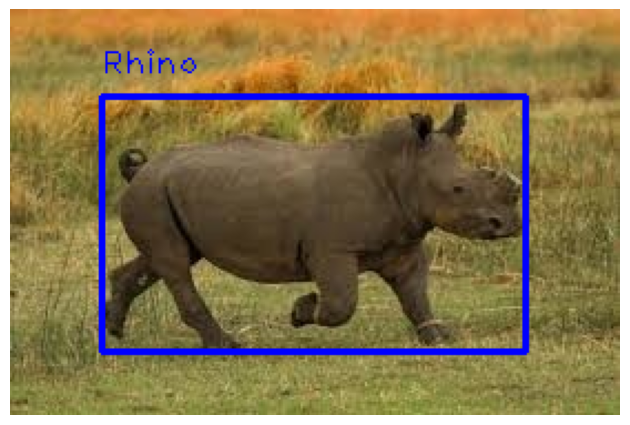

In [28]:
img = cv2.imread(image_test, cv2.IMREAD_COLOR)

for box in result.boxes:
    cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])), (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255,0,0), 2)
    cv2.putText(img, f"{result.names[int(box.cls[0])]}", (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
# axs[0].set_title(ANIMALS[1])

# Adjust spacing between subplots
plt.tight_layout()
# Display the figure
plt.show()